## **Import the Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## **Load Data**

In [2]:
dataset = pd.read_csv('student_exam_scores.csv')
display(dataset)

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3
...,...,...,...,...,...,...
195,S196,10.5,5.4,94.0,87,42.7
196,S197,7.1,6.1,85.1,92,40.4
197,S198,1.6,6.9,63.8,76,28.2
198,S199,12.0,7.3,50.5,58,42.0


## **Preprocessing**

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


There is no some missing values.

**Drop the 'student_id' feature as it does not contribute to modeling and prediction**

In [4]:
dataset_cp = dataset.copy()
dataset_cp = dataset_cp.drop(['student_id'], axis=1)
display(dataset_cp)

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,8.0,8.8,72.1,45,30.2
1,1.3,8.6,60.7,55,25.0
2,4.0,8.2,73.7,86,35.8
3,3.5,4.8,95.1,66,34.0
4,9.1,6.4,89.8,71,40.3
...,...,...,...,...,...
195,10.5,5.4,94.0,87,42.7
196,7.1,6.1,85.1,92,40.4
197,1.6,6.9,63.8,76,28.2
198,12.0,7.3,50.5,58,42.0


## **Data Visualization**

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

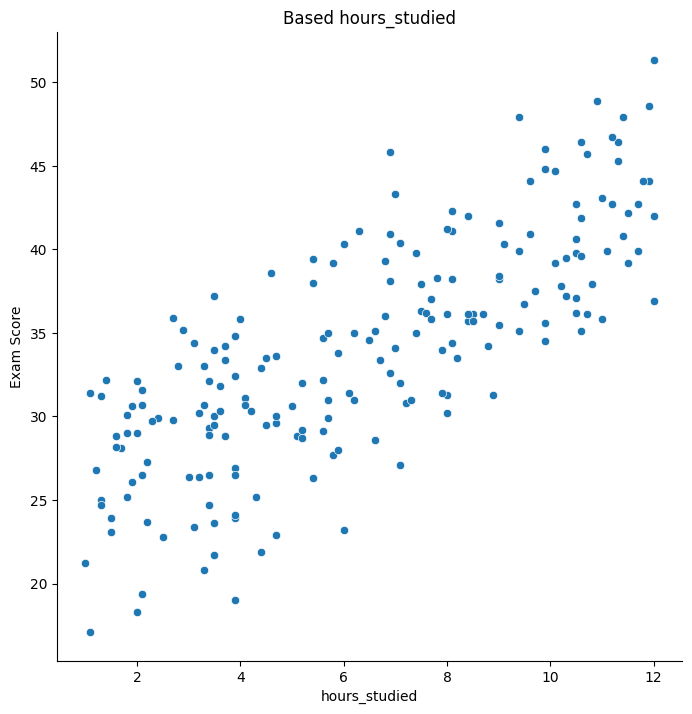

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

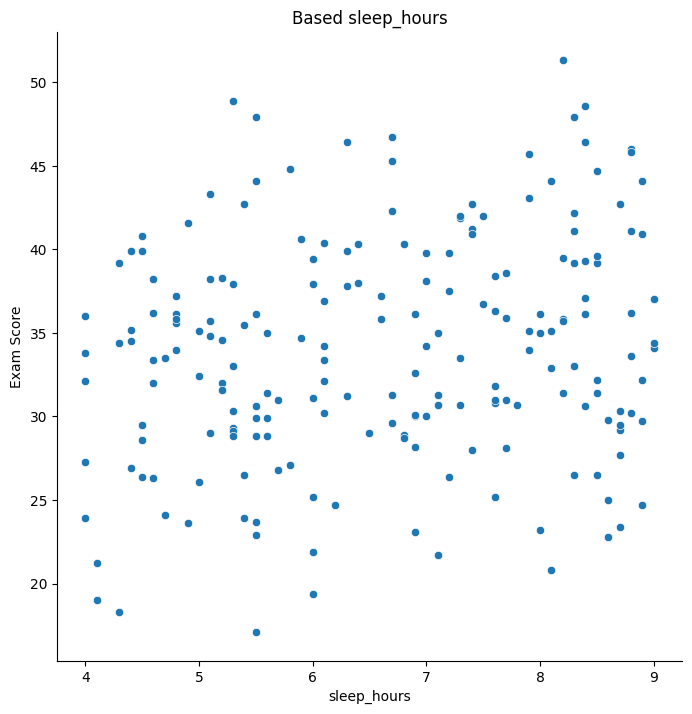

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

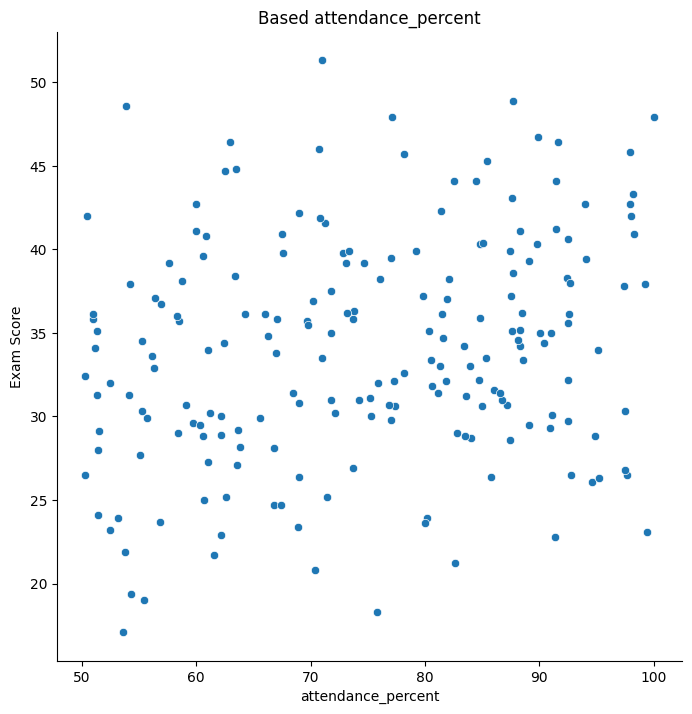

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

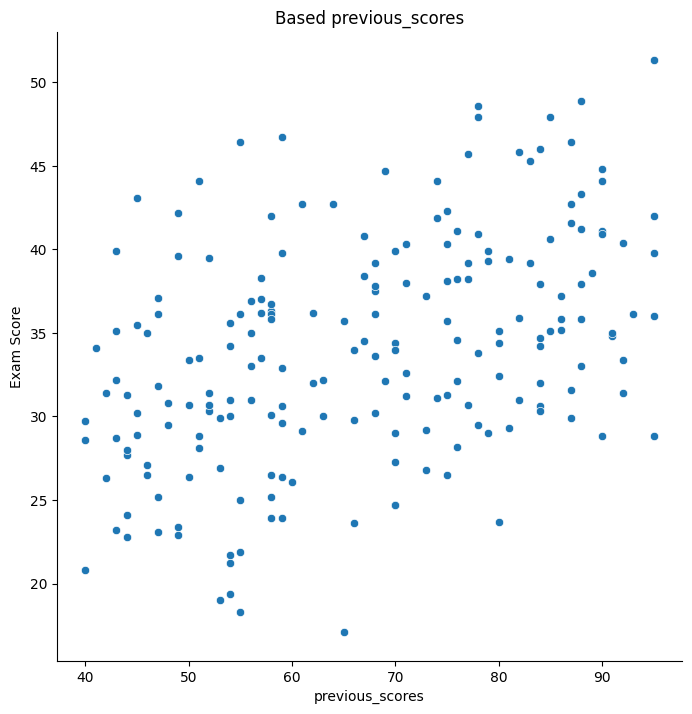

In [5]:
x_vars = ['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores']
y_var = 'exam_score'

for x_var in x_vars:
    plt.figure(figsize=(10,10))
    sns.pairplot(dataset_cp, x_vars = x_var, y_vars = y_var, size = 7, kind = 'scatter')
    plt.xlabel(x_var)
    plt.ylabel('Exam Score')
    plt.title(f'Based {x_var}')
    plt.show()

**Multivariate analysis: correlation check**

In [6]:
dataset_cp.corr()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
hours_studied,1.000000,0.077864,-0.031311,0.069078,0.776751
sleep_hours,0.077864,1.000000,0.000572,-0.194251,0.188222
attendance_percent,-0.031311,0.000572,1.000000,0.051958,0.225713
previous_scores,0.069078,-0.194251,0.051958,1.000000,0.431105
exam_score,0.776751,0.188222,0.225713,0.431105,1.000000


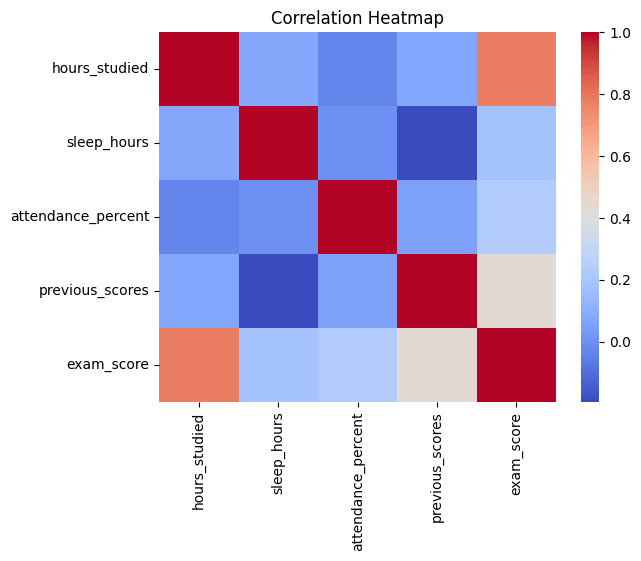

In [7]:
sns.heatmap(dataset_cp.corr(), cmap = 'coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

It can be seen that 'hours_studied' feature have a strong positive correlation with 'exam_score', while 'sleep_hours' has minimal impact.

## **Modelling**

**Splitting Data**

In [8]:
X = dataset_cp.drop(['exam_score'], axis=1)
y = dataset_cp['exam_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

**Modelling with Linear Regression, Decision Tree Regressor, and Random Forest Regressor**

In [9]:
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

lr_model.fit(X_train, y_train)

dt_model.fit(X_train, y_train)

rf_model.fit(X_train, y_train)

trained_models = {
    'Linear Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model
}

## **Evaluation**

**Model comparation**

In [10]:
evaluation_results = []

for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    evaluation_results.append({
        'Model': name,
        'RMSE': rmse,
        'R2 Score': r2
    })

results_df = pd.DataFrame(evaluation_results)

print("Model result comparation: ")
display(results_df)

Model result comparation: 


,Model,RMSE,R2 Score
0,Linear Regression,2.759032,0.871189
1,Decision Tree,4.473835,0.661313
2,Random Forest,3.418145,0.802294


**Comparation visualization**

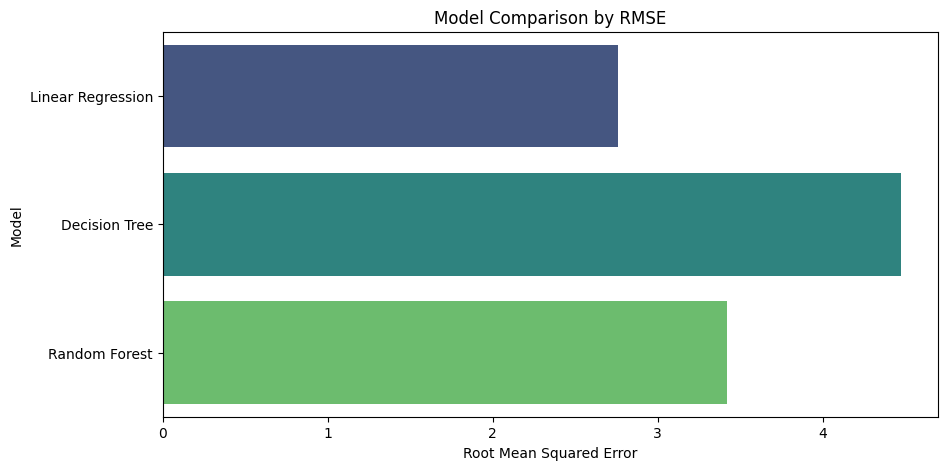

In [11]:
plt.figure(figsize=(10, 5))

sns.barplot(x='RMSE', y='Model', data=results_df, palette='viridis')
plt.title('Model Comparison by RMSE')
plt.xlabel('Root Mean Squared Error')
plt.ylabel('Model')
plt.show()

**Interpretation**

The Linear Regression model provides a lower RMSE and a higher $R^2$ score than the other two models. This indicates that Linear Regression successfully identifies linear patterns between variables in the input features and exam scores. The higher RMSEs of Random Forest and Decision Tree indicate the absence of nonlinear patterns.

With an RMSE of 2.76, Regression Linear model's average prediction error is 2-3 points off the actual score. If the exam score range is 0-100, the model's margin of error is about 2.7%.

This model produces an $R^2$ score of 0.87 that means 87% of the variation in exam scores can be explained by variations in the input features (study hours, sleep hours, attendance, and previous scores).

**Prediction Visualization**

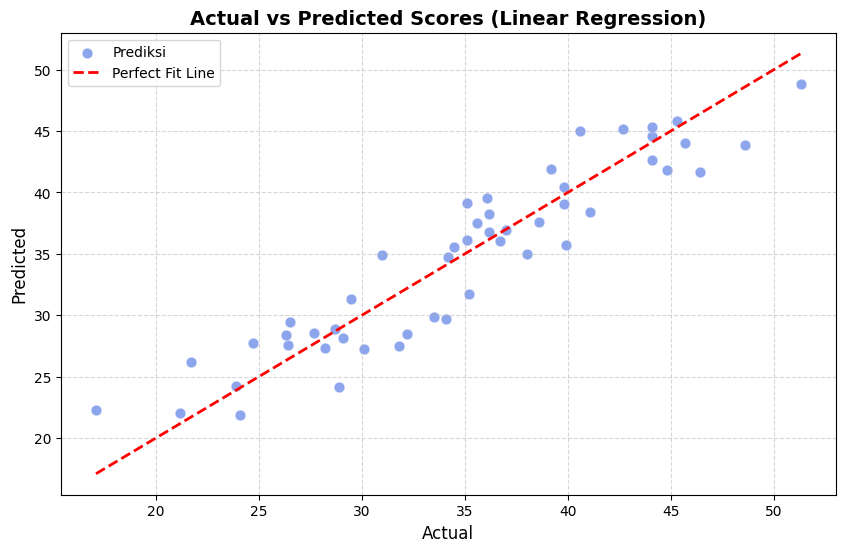

In [12]:
model_name = 'Linear Regression'
model_selected = trained_models[model_name]

y_pred_viz = model_selected.predict(X_test)

plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_test, y=y_pred_viz, color='royalblue', alpha=0.6, s=60, label='Prediksi')

min_val = min(y_test.min(), y_pred_viz.min())
max_val = max(y_test.max(), y_pred_viz.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Perfect Fit Line')

plt.title(f'Actual vs Predicted Scores ({model_name})', fontsize=14, fontweight='bold')
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

The points (scatter) appear to spread out following the red diagonal line (identity line). This confirms that the Linear Regression model successfully captures the basic pattern of the data, although there are some small deviations in the low range of scores, which may be caused by external factors (outliers) that are not captured by the existing features.

**Extract the coefficients**

In [13]:
coef_df = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
intercept = lr_model.intercept_

print(f"Intercept: {intercept:.2f}")
display(coef_df)

Intercept: -1.61


,Coefficient
hours_studied,1.555943
sleep_hours,0.827662
attendance_percent,0.106277
previous_scores,0.183409


**Mathematical equation:**

$y=1.55 \times H + 0.83 \times S + 0.11 \times A + 0.18 \times P - 1.61$

H: study hours

S: sleep hours

A: attendance percentation

P: previous score

**Interpretation:**

The hours_studied factor has the largest marginal impact on the exam score. For every additional an hour of study time, exam scores are predicted to increase by 1.55 points, assuming other variables (sleep, attendance, past grades) remain the same.

Intercept value indicates that student with zero study hour, sleep hour, attendace percentation, and past grades will get -1.61 points of exam score. Since there is no negative scores usually, that student is predicted to get 0 point.

## **Model Application**

In [14]:
def predict_score(hours, sleep, attendance, prev_score):
    input_data = pd.DataFrame([[hours, sleep, attendance, prev_score]],
                              columns=['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores'])
    pred = lr_model.predict(input_data)[0]
    return pred

print("Scenario 1: Dilligent student")
print(f"Prediction: {predict_score(10, 8, 95, 85):.2f}")

print("\nScenario 2: Lazy student")
print(f"Prediction: {predict_score(2, 4, 60, 50):.2f}")

Scenario 1: Dilligent student
Prediction: 46.26

Scenario 2: Lazy student
Prediction: 20.36
